In [2]:
# Imports
import numpy as np

from pandas import read_csv 

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from pyfume.Clustering import Clusterer
from pyfume.EstimateAntecendentSet import AntecedentEstimator
from pyfume.EstimateConsequentParameters import ConsequentEstimator
from pyfume.SimpfulModelBuilder import SugenoFISBuilder
from pyfume.Tester import SugenoFISTester

from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, explained_variance_score

import matplotlib.pyplot as plt

In [3]:
#  Load dataset and create train-test sets
data = read_csv('data/hairdryer.csv')

In [4]:
var_names = data.columns[0:-1]

<Axes: >

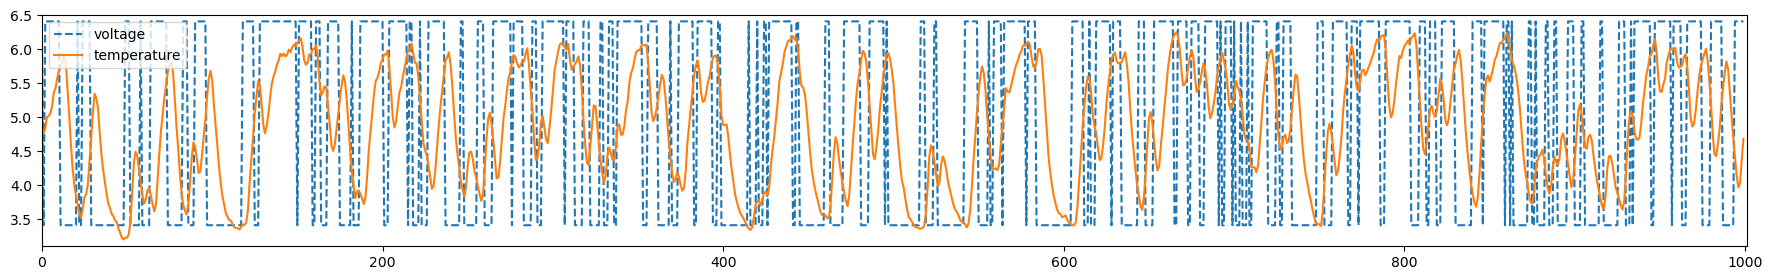

In [5]:
data.plot(figsize=(22,3) , xlim=(0,1001) , ylim=(3.1 , 6.5) , style=['--','-'])

<Axes: >

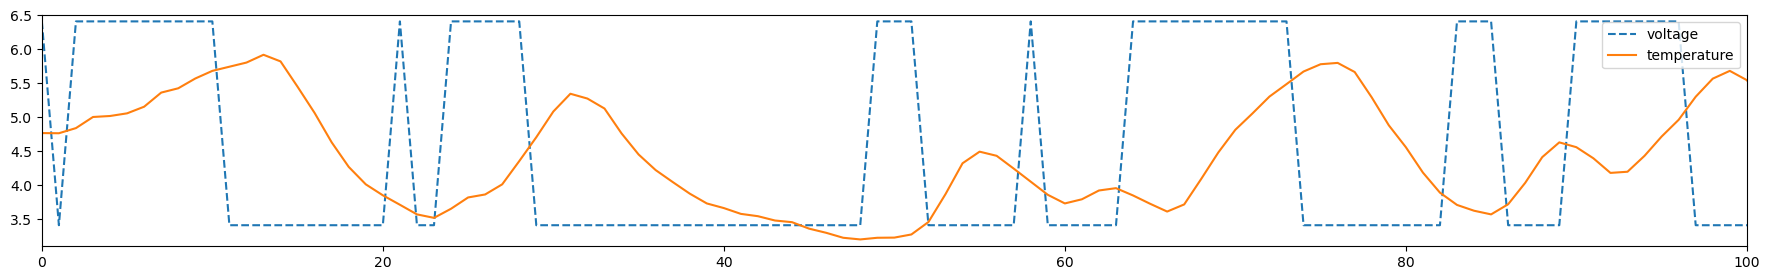

In [6]:
data.plot(figsize=(22,3) , xlim=(0,100) , ylim=(3.1 , 6.5) , style=['--','-'])

In [7]:
data = data.to_numpy()

(3.1, 6.5)

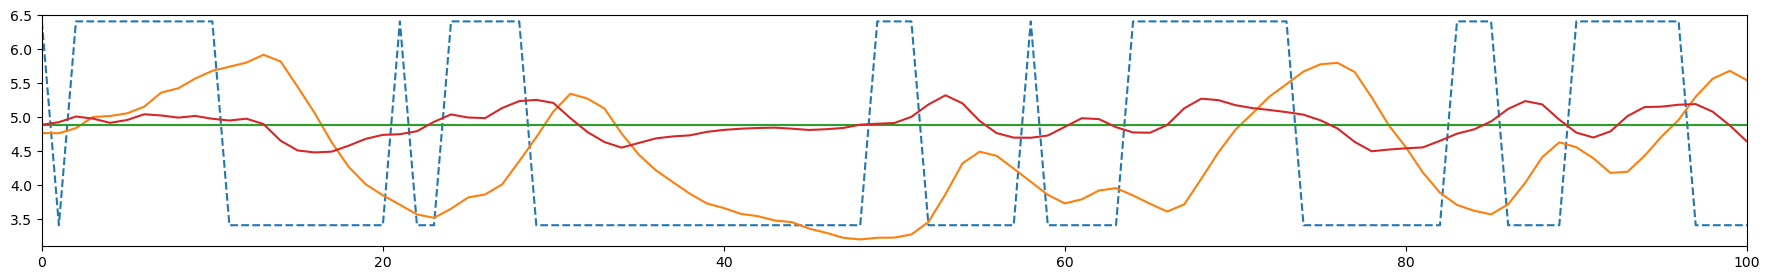

In [8]:
x_grad= np.arange(data[:,1].size)
temp_mean=np.mean(data[:,1])

plt.figure(figsize=(22, 3))  # Set figure size

plt.plot( x_grad ,data[:,0] , '--')
plt.plot( x_grad ,data[:,1] ,'-')
plt.plot( [0,1000], [temp_mean,temp_mean])
plt.plot( x_grad, np.gradient(data[:,1], x_grad)+temp_mean)

plt.xlim(0,100) 
plt.ylim(3.1 , 6.5)


In [9]:
%%script echo skipping

# Run this cell to normalize variables
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

Couldn't find program: 'echo'


In [10]:
# train/test split
X = data[:,0:-1]
y = data[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=314)

In [11]:
# %% Cluster the input-output space

number_of_clusters = 5

cl = Clusterer(x_train=X_train, y_train=y_train, nr_clus=number_of_clusters)  # Number of clusters
clust_centers, part_matrix, _ = cl.cluster(method='fcm')

In [12]:
# %% Estimate membership functions parameters
ae = AntecedentEstimator(X_train, part_matrix)
antecedent_params = ae.determineMF()

In [13]:
# %% Estimate consequent parameters
ce = ConsequentEstimator(X_train, y_train, part_matrix)
conseq_params = ce.suglms()

In [14]:
# %% Build first-order Takagi-Sugeno model
modbuilder = SugenoFISBuilder(antecedent_params, conseq_params, var_names, save_simpful_code=True) #change this setting to save simpful code
model = modbuilder.get_model()

 * Detected 5 rules / clusters
 * Code saved to file Simpful_code.py
 * Detected Sugeno model type


In [15]:
# %% Get model predictions
modtester = SugenoFISTester(model, X_test, var_names)
y_pred = modtester.predict()[0]

In [16]:
# %% Compute regression metrics
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: {:.3f}".format(mse))
mape = mean_absolute_percentage_error(y_test, y_pred)
print("Mean Absolute Percentage Error: {:.1f}%".format(mape*100))
exp_var = explained_variance_score(y_test, y_pred)
print("Explained Variance Score: {:.3f}".format(exp_var))

Mean Squared Error: 0.686
Mean Absolute Percentage Error: 15.5%
Explained Variance Score: 0.014


# Comparing settings

Fazer gráfico train error vs test error 

 * Detected 2 rules / clusters
 * Detected Sugeno model type
Method: fcm, Clusters: 2
Training MSE: 1.215, Test MSE: 1.275
 * Detected 3 rules / clusters
 * Detected Sugeno model type
Method: fcm, Clusters: 3
Training MSE: 1.512, Test MSE: 1.562
 * Detected 4 rules / clusters
 * Detected Sugeno model type
Method: fcm, Clusters: 4
Training MSE: 0.847, Test MSE: 0.897
 * Detected 5 rules / clusters
 * Detected Sugeno model type
Method: fcm, Clusters: 5
Training MSE: 0.717, Test MSE: 0.761
 * Detected 6 rules / clusters
 * Detected Sugeno model type
Method: fcm, Clusters: 6
Training MSE: 0.680, Test MSE: 0.725
 * Detected 7 rules / clusters
 * Detected Sugeno model type
Method: fcm, Clusters: 7
Training MSE: 0.684, Test MSE: 0.717
 * Detected 8 rules / clusters
 * Detected Sugeno model type
Method: fcm, Clusters: 8
Training MSE: 0.810, Test MSE: 0.839
 * Detected 9 rules / clusters
 * Detected Sugeno model type
Method: fcm, Clusters: 9
Training MSE: 1.200, Test MSE: 1.195
 * Detected 10 r

c:\Users\afons\miniconda3\Lib\site-packages\sklearn\metrics\_regression.py:446: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
c:\Users\afons\miniconda3\Lib\site-packages\sklearn\metrics\_regression.py:446: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)


Method: gk, Clusters: 10
Training MSE: inf, Test MSE: inf
 * Detected 11 rules / clusters
 * Detected Sugeno model type
Method: gk, Clusters: 11
Training MSE: 22281142827604865049607391057443297529051791692851352455071650094131517706308711569123899221035066424062792474722597329509911138832931769085883407386746349770149150570970086592920918262530343027225041574277077256136447280576113993500271019230372823163036589184826428056666112.000, Test MSE: 21488924415956691933395621905249526319299452784634788350300359001101212693494731137493987779894383725640150193910072375768770909094189417793175104149999864444210763556904254467293856835718877689497796890987494025417653024414611466050763299759834270692760361648773079324688384.000
 * Detected 12 rules / clusters
 * Detected Sugeno model type
Method: gk, Clusters: 12
Training MSE: 1023292289641893138141815379797853547164582798934128537759146539359212562747865487443912320527210912274609186051879715346132357074059693164176822998068863252918487322593

c:\Users\afons\miniconda3\Lib\site-packages\sklearn\metrics\_regression.py:446: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
c:\Users\afons\miniconda3\Lib\site-packages\sklearn\metrics\_regression.py:446: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)


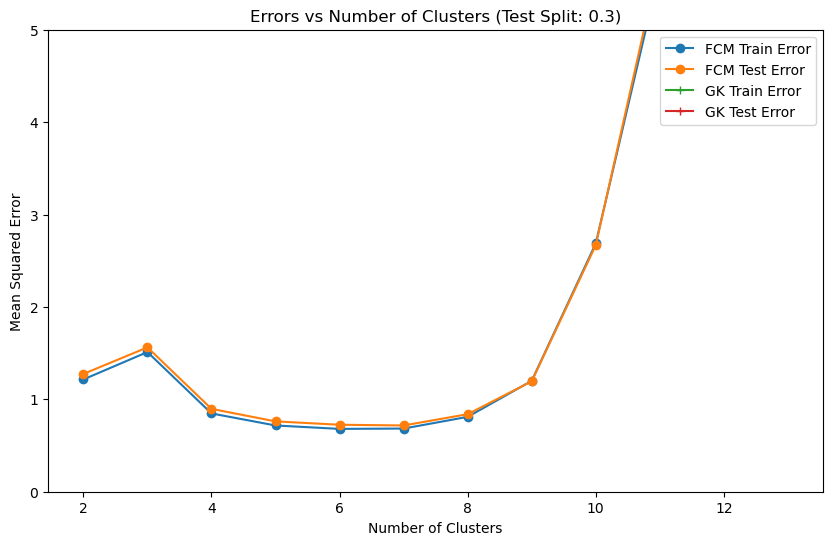

 * Detected 2 rules / clusters
 * Detected Sugeno model type
Method: fcm, Clusters: 2
Training MSE: 1.109, Test MSE: 1.187
 * Detected 3 rules / clusters
 * Detected Sugeno model type
Method: fcm, Clusters: 3
Training MSE: 1.474, Test MSE: 1.572
 * Detected 4 rules / clusters
 * Detected Sugeno model type
Method: fcm, Clusters: 4
Training MSE: 0.869, Test MSE: 0.894
 * Detected 5 rules / clusters
 * Detected Sugeno model type
Method: fcm, Clusters: 5
Training MSE: 0.730, Test MSE: 0.727
 * Detected 6 rules / clusters
 * Detected Sugeno model type
Method: fcm, Clusters: 6
Training MSE: 0.699, Test MSE: 0.714
 * Detected 7 rules / clusters
 * Detected Sugeno model type
Method: fcm, Clusters: 7
Training MSE: 0.737, Test MSE: 0.727
 * Detected 8 rules / clusters
 * Detected Sugeno model type
Method: fcm, Clusters: 8
Training MSE: 0.787, Test MSE: 0.789
 * Detected 9 rules / clusters
 * Detected Sugeno model type
Method: fcm, Clusters: 9
Training MSE: 0.918, Test MSE: 0.919
 * Detected 10 r

c:\Users\afons\miniconda3\Lib\site-packages\sklearn\metrics\_regression.py:446: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
c:\Users\afons\miniconda3\Lib\site-packages\sklearn\metrics\_regression.py:446: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)


Method: gk, Clusters: 9
Training MSE: inf, Test MSE: inf
 * Detected 10 rules / clusters
 * Detected Sugeno model type
Method: gk, Clusters: 10
Training MSE: 24.543, Test MSE: 24.659
 * Detected 11 rules / clusters
 * Detected Sugeno model type
Method: gk, Clusters: 11
Training MSE: 24.543, Test MSE: 24.659
 * Detected 12 rules / clusters
 * Detected Sugeno model type
Method: gk, Clusters: 12
Training MSE: 24.543, Test MSE: 24.659
 * Detected 13 rules / clusters
 * Detected Sugeno model type
Method: gk, Clusters: 13
Training MSE: 3359394751255872572266019961994590286052530515419356929971372165333555874217224974128474666283402470614599881175994058086386879388750119368984294022674790599636361070418618657281889835092183880429796402392975304462537756201820889743862860714395504565149205058496795508736.000, Test MSE: 348757124989621528484657238071644999218774217019229141662793866039169062693853811803200022378315578505856801934757985885393806608408241363976616485354030818927128009885695493636

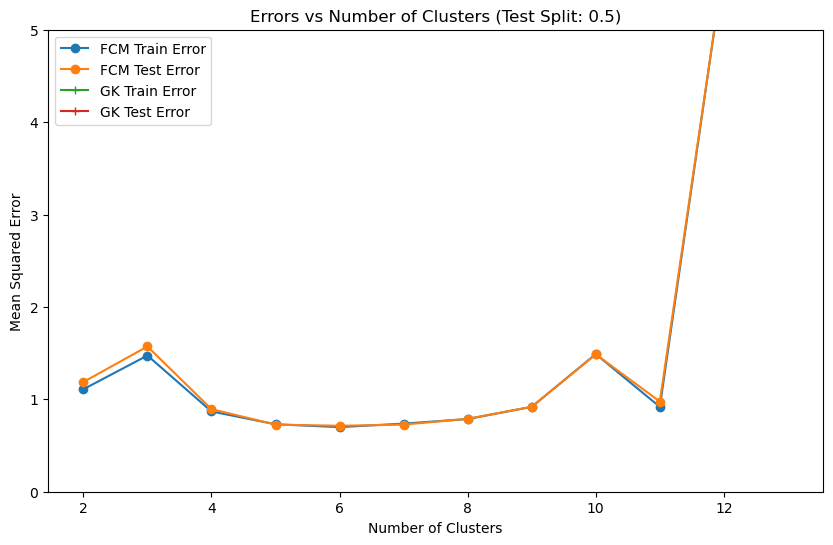

 * Detected 2 rules / clusters
 * Detected Sugeno model type
Method: fcm, Clusters: 2
Training MSE: 1.440, Test MSE: 1.421
 * Detected 3 rules / clusters
 * Detected Sugeno model type
Method: fcm, Clusters: 3
Training MSE: 1.546, Test MSE: 1.536
 * Detected 4 rules / clusters
 * Detected Sugeno model type
Method: fcm, Clusters: 4
Training MSE: 0.913, Test MSE: 0.911
 * Detected 5 rules / clusters
 * Detected Sugeno model type
Method: fcm, Clusters: 5
Training MSE: 0.739, Test MSE: 0.756
 * Detected 6 rules / clusters
 * Detected Sugeno model type
Method: fcm, Clusters: 6
Training MSE: 0.734, Test MSE: 0.718
 * Detected 7 rules / clusters
 * Detected Sugeno model type
Method: fcm, Clusters: 7
Training MSE: 0.723, Test MSE: 0.705
 * Detected 8 rules / clusters
 * Detected Sugeno model type
Method: fcm, Clusters: 8
Training MSE: 1.129, Test MSE: 1.126
 * Detected 9 rules / clusters
 * Detected Sugeno model type
Method: fcm, Clusters: 9
Training MSE: 0.825, Test MSE: 0.849
 * Detected 10 r

c:\Users\afons\miniconda3\Lib\site-packages\sklearn\metrics\_regression.py:446: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
c:\Users\afons\miniconda3\Lib\site-packages\sklearn\metrics\_regression.py:446: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)


Method: gk, Clusters: 9
Training MSE: inf, Test MSE: inf
 * Detected 10 rules / clusters
 * Detected Sugeno model type
Method: gk, Clusters: 10
Training MSE: 9062809908048765225004779949405116062390581623020773375046203319603817780336033091219924957012048495292197734338534226778308281320018335311762300997141430275454092261862526410438577648627749969494603401068019712.000, Test MSE: 9062809908048764057019981838123140090250650563746194202379705463972475552062748509005482151590637549778518037091455883445877030479850063775453892325029302722772794412975694217927941012399922748278810185937453056.000
 * Detected 11 rules / clusters
 * Detected Sugeno model type
Method: gk, Clusters: 11
Training MSE: 45166005888991011070544795971162181496481189480563941462476263254681064464345616581383015816063933185674635704356962238447880792314152953760233029132736802361927035339499209024555759148393383071249383836809624785116744474737793238599019190550528.000, Test MSE: 4516600588899101107054479597116218149

c:\Users\afons\miniconda3\Lib\site-packages\sklearn\metrics\_regression.py:446: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
c:\Users\afons\miniconda3\Lib\site-packages\sklearn\metrics\_regression.py:446: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)


Method: gk, Clusters: 12
Training MSE: inf, Test MSE: inf
 * Detected 13 rules / clusters
 * Detected Sugeno model type
Method: gk, Clusters: 13
Training MSE: 24.394, Test MSE: 24.690


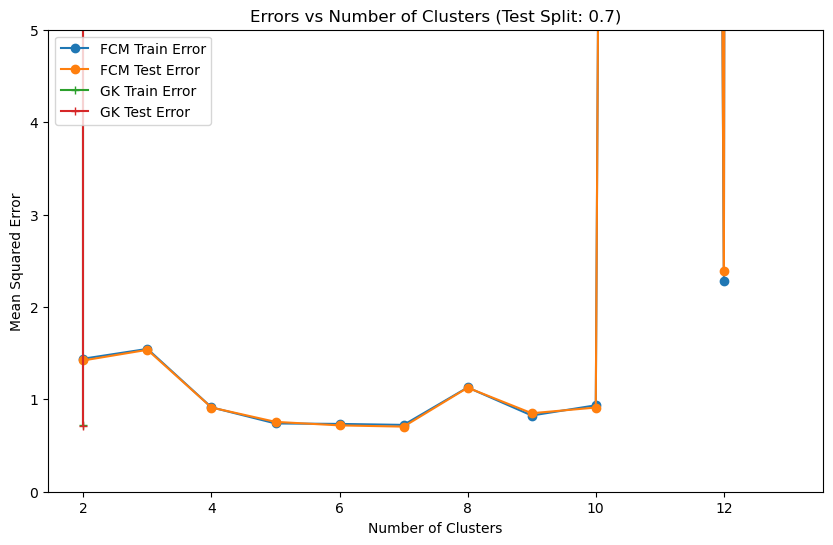

In [20]:
# Define the test split sizes
test_split_sizes = [0.3, 0.5, 0.7]

# Loop over different test split sizes
for split_size in test_split_sizes:
    # Train/test split
    X = data[:, 0:-1]
    y = data[:, -1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_size, random_state=314)

    # Lists to store errors for each method
    fcm_train_errors = []
    fcm_test_errors = []
    gk_train_errors = []
    gk_test_errors = []

    ncl = np.arange(2, 14)
    mtd = ['fcm', 'gk']
    
    # Capture training and test errors
    for mth in mtd:
        train_errors = []
        test_errors = []
        
        for n in ncl:
            # Clustering
            cl = Clusterer(x_train=X_train, y_train=y_train, nr_clus=n)
            clust_centers, part_matrix, _ = cl.cluster(method=mth)

            # Estimate membership functions parameters
            ae = AntecedentEstimator(X_train, part_matrix)
            antecedent_params = ae.determineMF()

            # Estimate consequent parameters
            ce = ConsequentEstimator(X_train, y_train, part_matrix)
            conseq_params = ce.suglms(global_fit=True)  # Using global_fit as an example

            # Build the first-order Takagi-Sugeno model
            modbuilder = SugenoFISBuilder(antecedent_params, conseq_params, var_names, save_simpful_code=False)
            model = modbuilder.get_model()

            # Predictions on training data
            modtester_train = SugenoFISTester(model, X_train, var_names)
            y_train_pred = modtester_train.predict()[0]
            
            # Predictions on test data
            modtester_test = SugenoFISTester(model, X_test, var_names)
            y_test_pred = modtester_test.predict()[0]

            # Compute training and test errors
            train_mse = mean_squared_error(y_train, y_train_pred)
            test_mse = mean_squared_error(y_test, y_test_pred)

            # Store errors for the current method and cluster count
            train_errors.append(train_mse)
            test_errors.append(test_mse)

            print(f"Method: {mth}, Clusters: {n}")
            print(f"Training MSE: {train_mse:.3f}, Test MSE: {test_mse:.3f}")
        
            # Store the results for each method separately
            if mth == 'fcm':
                fcm_train_errors = train_errors
                fcm_test_errors = test_errors
            elif mth == 'gk':
                gk_train_errors = train_errors
                gk_test_errors = test_errors

    # Plotting the errors vs number of clusters for the current test split
    plt.figure(figsize=(10, 6))

    # FCM method
    plt.plot(ncl, fcm_train_errors, 'o-', label='FCM Train Error')
    plt.plot(ncl, fcm_test_errors, 'o-', label='FCM Test Error')

    # GK method
    plt.plot(ncl, gk_train_errors, '+-', label='GK Train Error')
    plt.plot(ncl, gk_test_errors, '+-', label='GK Test Error')

    # Title and axis labels
    plt.title(f'Errors vs Number of Clusters (Test Split: {split_size})')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Mean Squared Error')

    # Set y-limits for better visualization
    plt.ylim(0, 5)

    # Show legend
    plt.legend()

    # Show plot
    plt.show()


fazer gráfico com actual vs predicted values

In [18]:
%%script echo skipping

### Plot the actual values vs the predicted values of the test data using the matplotlib library

# this is done already on the cell above 
""""# Predict the labels of the test data
pred = model.predict_test_data()"""


"""# Get the actual labels of the test data
_, actual = modbuilder.get_data(data_set='test')
"""

# Create scatterplot
import matplotlib.pyplot as plt 
plt.scatter(y_test, y_pred)
plt.xlabel('Actual value') 
plt.ylabel('Predicted value')
#plt.plot([0,85],[0,85],'r')     # Add a reference line
plt.show()

Couldn't find program: 'echo'


usar K-fold CV para obter performance de cada modelo (modelos com diferentes numeros de clusters)